In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj2b.ok')

Assignment: proj2b
OK, version v1.13.11



# Project 2 Part B: Spam/Ham Classification
## Classifiers
### The assignment is due on Monday, April 27th at 11:59pm PST.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: Nick Ramirez, Shaked Salem, Jordan Keen

## This Assignment
In Project 2 Part A, you made an effort to understand the data through EDA, and did some basic feature engineering. You also built a Logistic Regression model to classify Spam/Ham emails. In Part B, you will learn how to evaluate the classifiers you built. You will also have the chance to improve your model by selecting more features.

## Warning
We've tried our best to filter the data for anything blatantly offensive as best as we can, but unfortunately there may still be some examples you may find in poor taste. If you encounter these examples and believe it is inappropriate for students, please let a TA know and we will try to remove it for future semesters. Thanks for your understanding!

## Score Breakdown
Question | Points
--- | ---
6a | 1
6b | 1
6c | 2
6d | 2
6e | 1
6f | 3
7 | 6
8 | 6
9 | 15
Total | 37

## Setup

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [3]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

Using version already downloaded: Wed Apr 22 16:25:07 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Wed Apr 22 16:25:08 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


The following code is adapted from Part A of this project. You will be using it again in Part B.

In [4]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = 1 * np.array([texts.str.contains(word) for word in words]).T
    return indicator_array

some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email']) 
Y_train = np.array(train['spam'])

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]), array([0, 0, 0, 0, 0]))

Recall that you trained the following model in Part A.

In [5]:
from sklearn.linear_model import LogisticRegression

model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


## Evaluating Classifiers

The model you trained doesn't seem too shabby! But the classifier you made above isn't as good as this might lead us to believe. First, we are evaluating accuracy on the training set, which may provide a misleading accuracy measure, especially if we used the training set to identify discriminative features. In future parts of this analysis, it will be safer to hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

The following image might help:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (answers can be hard-coded):

*Tests in Question 6 only check that you have assigned appropriate types of values to each response variable, but do not check that your answers are correct.*

<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [6]:
train.head()
zero_predictor_fp = 0
zero_predictor_fn = len(train[train['spam']==1])
zero_predictor_fn

1918

In [7]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do **NOT** use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [8]:
print(len(train[train['spam']==1]), len(train[train['spam']== 0]), len(train['spam']))
zero_predictor_acc = 5595/7513
zero_predictor_recall = 0

1918 5595 7513


In [9]:
ok.grade("q6b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6c

Provide brief explanations of the results from 6a and 6b. Explain why the number of false positives, number of false negatives, accuracy, and recall all turned out the way they did.

<!--
BEGIN QUESTION
name: q6c
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

The number of false positives is 0 because it always classifies emails as non-spam. The number of false negatives is extremely high because the 0 predictor never marks emails as spam. The accuracy is arround 3/4 since most emails are in fact not spam. However, the recall is 0 because it never correctly classifies emails as spam.

### Question 6d

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Part A. Do **NOT** use any `sklearn` functions.

**Note: In lecture we used the `sklearn` package to compute the rates. Here you should work through them using just the definitions to help build a deeper understanding.**

<!--
BEGIN QUESTION
name: q6d
points: 2
-->

In [10]:
Y_train_hat = model.predict(X_train)

pred_tp = sum((Y_train_hat == Y_train) & (Y_train_hat == 1))
pred_fp = sum((Y_train_hat != Y_train) & (Y_train_hat == 1))
pred_tn = sum((Y_train_hat == Y_train) & (Y_train_hat == 0))
pred_fn = sum((Y_train_hat != Y_train) & (Y_train_hat == 0))
logistic_predictor_precision = pred_tp/(pred_tp + pred_fp)
print(logistic_predictor_precision)
logistic_predictor_recall = pred_tp/(pred_tp + pred_fn)
print(logistic_predictor_recall)
logistic_predictor_far = pred_fp/(pred_fp + pred_tn)
print(logistic_predictor_far)

0.6422287390029325
0.11418143899895725
0.021805183199285077


In [11]:
ok.grade("q6d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6e

Are there more false positives or false negatives when using the logistic regression classifier from Part A?

<!--
BEGIN QUESTION
name: q6e
manual: True
points: 1
-->
<!-- EXPORT TO PDF -->

They're more false negatives than false positives(0 predictor) than in the model we defined in part A.

### Question 6f

1. Our logistic regression classifier got 75.8% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features we gave you above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

<!--
BEGIN QUESTION
name: q6f
manual: True
points: 3
-->
<!-- EXPORT TO PDF -->

1. Both they're accuracies were very similar. The 0 predictor has an accuracy of 74.4% which is only slightly worse than the logistic regression classfier we defined in part a.
2. The words we chose have a high prevelance in both spam and ham emails. Therefore I do not think they are the ideal word choice.
3. I would probably go with the 0 predictor since the accuracies are very similar, and I would not want the risk of losing a potentially important email.

## Moving Forward

With this in mind, it is now your task to make the spam filter more accurate. In order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the test set. To see your accuracy on the test set, you will use your classifier to predict every email in the `test` DataFrame and upload your predictions to Kaggle.

**Kaggle limits you to four submissions per day**. This means you should start early so you have time if needed to refine your model. You will be able to see your accuracy on the entire set when submitting to Kaggle (the accuracy that will determine your score for question 9).

Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better (and/or more) words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features, but **you are not allowed to import any external feature extraction libraries**. In addition, **you are only allowed to train logistic regression models**. No random forests, k-nearest-neighbors, neural nets, etc.

We have not provided any code to do this, so feel free to create as many cells as you need in order to tackle this task. However, answering questions 7, 8, and 9 should help guide you.

---

**Note:** *You should use the **validation data** to evaluate your model and get a better sense of how it will perform on the Kaggle evaluation.*

---

Text(0.5, 0, 'Number of Words in Body of Email')

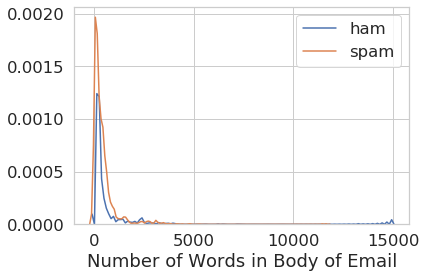

In [12]:
#Count amount of words per email body
train_c = train.copy()
train_c['total_words'] = train.email.apply(lambda x: len(x.split()))
# Now plot this
ham_words = train_c[train['spam'] == 0]
spam_words = train_c[train_c['spam'] == 1]
sns.distplot(ham_words['total_words'], label = 'ham', hist=False)
sns.distplot(spam_words['total_words'], label = 'spam', hist = False)
plt.xlabel('Number of Words in Body of Email')

# maybe not the most important feature 

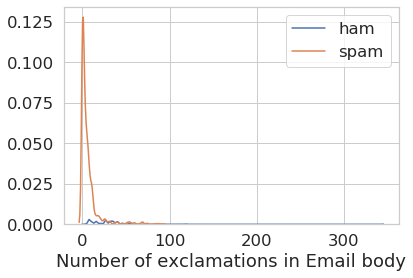

In [13]:
# exclamation count
train_c['total_exclamation'] = train_c.email.str.count('!')
# make graph
ham_exclam = train_c[train_c['spam'] == 0]
spam_exclam = train_c[train_c['spam'] == 1]
sns.distplot(ham_exclam['total_exclamation'], label = 'ham', hist = False)
sns.distplot(spam_exclam['total_exclamation'], label = 'spam', hist = False)
plt.xlabel('Number of exclamations in Email body')
plt.show()
# this looks super important

Text(0.5, 0, 'Number of @ in Email Body')

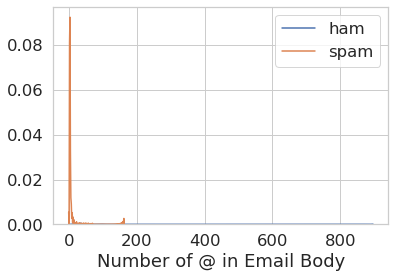

In [14]:
# @ sign in body
train_c['total_@'] = train_c.email.str.count('@')
ham_at = train_c[train_c['spam'] == 0]
spam_at = train_c[train_c['spam'] == 1]
sns.distplot(ham_at['total_@'], label = 'ham', hist = False)
sns.distplot(spam_at['total_@'], label = 'spam', hist = False)
plt.xlabel('Number of @ in Email Body')
# also very important 

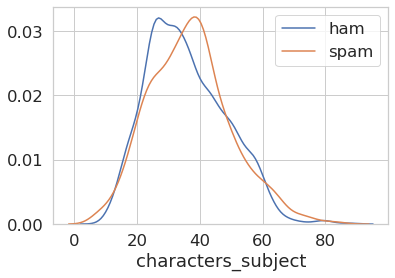

In [15]:
# number of characters in subject
train_c['characters_subject'] = train_c['subject'].str.findall('\w').str.len()
ham_sub_char = train_c[train['spam'] == 0]
spam_sub_char = train_c[train_c['spam'] == 1]
sns.distplot(ham_sub_char['characters_subject'], label = 'ham', hist = False)
sns.distplot(spam_sub_char['characters_subject'], label = 'spam', hist = False)
# slightly more for spam

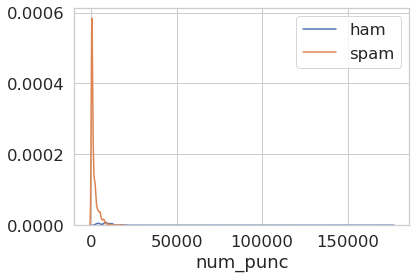

In [16]:
# punctuation
train_c['num_punc'] = (train_c['email'].str.findall('[^A-Za-z0-9]')
                     .str.len())#
num_punc_ham = train_c[train_c['spam'] == 0]
num_punc_spam = train_c[train_c['spam'] == 1]
sns.distplot(num_punc_ham['num_punc'], label = 'ham', hist = False)
sns.distplot(num_punc_spam['num_punc'], label = 'spam', hist = False)

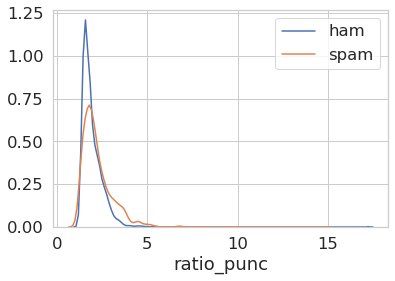

In [17]:
# ratio punctuation to characters
train_c['ratio_punc'] = (train_c['email'].str.findall('[^A-Za-z0-9]')
                     .str.len())/(train_c['email'].str.findall('\w+')).str.len()
rat_punc_ham = train_c[train_c['spam'] == 0]
rat_punc_spam = train_c[train_c['spam'] == 1]
sns.distplot(rat_punc_ham['ratio_punc'], label = 'ham', hist = False)
sns.distplot(rat_punc_spam['ratio_punc'], label = 'spam', hist = False)


In [18]:
#Lets add some potentially useful words
def contains_word(df, list_word):
    return df['email'].str.findall(list_word).str.len()


In [19]:
# function to find ip address
def ip_address(df):
    ip = df["email"].str.findall('[0-9]{1,3}(\.[0-9]{1,3}){3}').str.len()
    return ip


print('ham', ip_address(train[train['spam']==0]).sum())
print('spam', ip_address(train[train['spam']==1]).sum())

ham 363
spam 1344


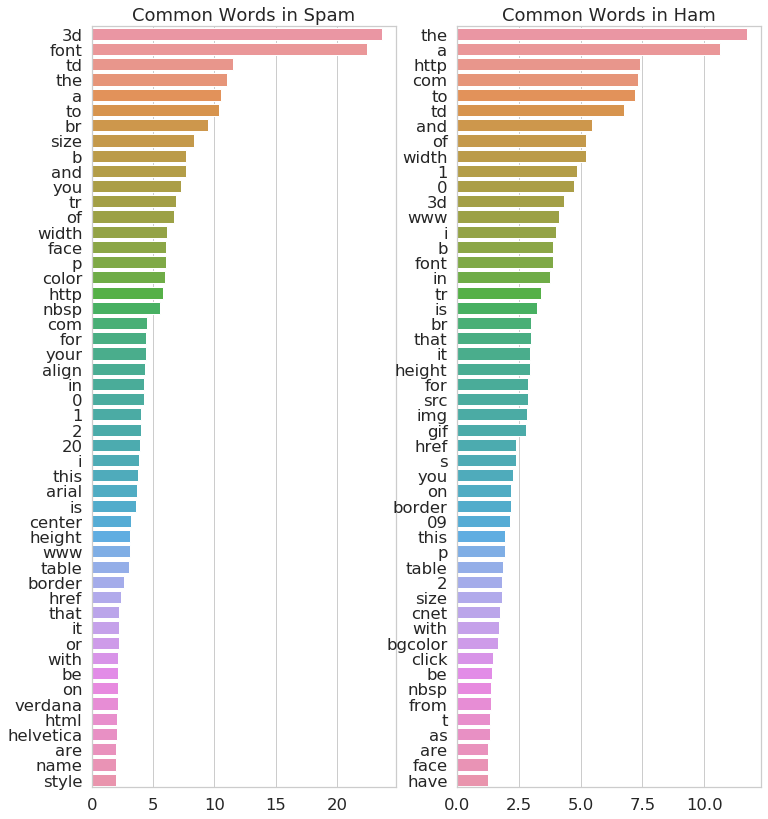

the        11.560628
a          10.611340
3d          9.258751
font        8.622521
to          8.021430
             ...    
re          0.319446
money       0.313856
mailman     0.310928
strong      0.309863
0d          0.308931
Length: 200, dtype: float64

In [20]:
# def w(df):
#     return pd.Series(' '.join(df['email']).str.lower().split(' ')).value_counts()[:100] 
#more efficient this way but raised an error due to the inclusion of none type
import re
def common_words(df):
    list_of_words = {}
    for email in df['email']:
        words = re.findall('\w+', email)
        for word in words:
            list_of_words[word] = (list_of_words[word] + 1) if word in list_of_words else 1
    return list_of_words

spam = train[train['spam']==1]
ham = train[train['spam']==0]

spam_grouped = (pd.Series(common_words(spam)) / spam.shape[0]).sort_values(ascending=False)
ham_grouped = (pd.Series(common_words(ham)) / ham.shape[0]).sort_values(ascending=False)

spam_grouped = spam_grouped.iloc[:300]
ham_grouped = ham_grouped.iloc[:300]

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(12,14)

spam_bar = sns.barplot(x=spam_grouped.head(50).values, y=spam_grouped.head(50).index, ax=axs[0])
spam_bar.set_title("Common Words in Spam")
hams_bar = sns.barplot(x=ham_grouped.head(50).values, y=ham_grouped.head(50).index, ax=axs[1])
hams_bar.set_title("Common Words in Ham")

plt.show()

keys_words = (pd.Series(common_words(train)) / train.shape[0]).sort_values(ascending=False)[:200]
#(pd.Series(words2(train)) / train.shape[0]).sort_values(ascending=False)[:200]
keys_words

In [21]:
# a =['shipping', 'today', 'online',
#              'here', 'available', 'fingertips', 'free',
#             'offer', 'buy', 'size', 'rx', 'html']
# b = keys_words.to_frame()
# b = b.reset_index()

# list_words = b["index"].astype(str)
# pd.Series(' '.join(train['email']).lower().split(' ')).value_counts().index[0]
# #a.append(keys_words.index.tolist())
# #1 * np.array([train['email'].iloc[0:5].str.contains(word) for word in list_words]).T
# #[print(word) for word in list_words]
# #words_in_texts(list_words, train['email'])
# #def w(df):
#    # return pd.Series(' '.join(df['email']).str.lower().split(' ')).value_counts()[:100]
# #train['email'].str.lower().str.split(' ').apply(value_counts)

In [22]:
# create function that creates all desired features in data frame
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import re

def make_features(df): # use all the features we made above
    """Takes in a data set and returns data
    set with more features to pre-process 
    before using logistic regression for classification."""
    words = ['shipping', 'today', 'online',
             'here', 'available', 'fingertips', 'free',
            'offer', 'buy', 'size', 'rx', 'html', 'please', 'hurry'] + keys_words.index.tolist() 
    word_mat = words_in_texts(words, df['email'])
    X_features = pd.concat([
        contains_word(df, "!"),
        contains_word(df, '@'),
        #contains_word(df, ':'),
        #contains_word(df, 'free'),
        ip_address(df),
        #df['email'].str.findall('[^A-Za-z0-9]').str.len()/(df['email'].str.findall('\w+')).str.len(),
        (df['email'].str.findall('[^A-Za-z0-9]').str.len()),
        (df['subject'].str.findall('[^A-Za-z0-9]').str.len()),
        df['subject'].str.findall('\w').str.len(),
        df['subject'].str.findall('\w').str.len()
    ], axis = 1).values
    
    X = np.concatenate((word_mat, X_features), axis = 1)
    return X
#lets fit a model
X_train = make_features(train)
X_train = np.nan_to_num(X_train) # error with large value or nan
Y_train = train['spam'] # no error in it

model = LogisticRegressionCV(fit_intercept=True, cv = 7, verbose=2, Cs = 6, random_state=100)
model.fit(X_train, Y_train)
training_score = model.score(X_train, Y_train)
print("Training Score", training_score)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alt

Training Score 0.9691201916677759


/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Question 7: Feature/Model Selection Process

In the following cell, describe the process of improving your model. You should use at least 2-3 sentences each to address the follow questions:

1. How did you find better features for your model?
2. What did you try that worked / didn't work?
3. What was surprising in your search for good features?

<!--
BEGIN QUESTION
name: q7
manual: True
points: 6
-->
<!-- EXPORT TO PDF -->

1. To some extent it was a process of trial and error. I ploted out density plots for some of the suggested features to see if some were more associated with spam or ham. I also did some external research to find words/symbols that are correlated with spam/ham emails. The function I defined to find the most commonly used words in spam and ham emails proved to be very useful and I was able to input the list of words into the function we defined in part a of the project.
2. The ratio of punctuation to actual text was not very useful in predicting spam from ham. The exclammation point and the @ sign proved to both be very useful. Moreover, emails that contain an IP address were more likely to be spam
3. Some features were less useful than I would have thought. For example, the ratio of characters to text was not very useful. I was also surprised by most of the indicative words in this set. They were not what I would consider blatently spam like. They were mostly normal words. I was also surprised how useful the @ sign was as an indicator. 

### Question 8: EDA

In the cell below, show a visualization that you used to select features for your model. Include

1. A plot showing something meaningful about the data that helped you during feature selection, model selection, or both.
2. Two or three sentences describing what you plotted and its implications with respect to your features.

Feel to create as many plots as you want in your process of feature selection, but select one for the response cell below.

**You should not just produce an identical visualization to question 3.** Specifically, don't show us a bar chart of proportions, or a one-dimensional class-conditional density plot. Any other plot is acceptable, as long as it comes with thoughtful commentary. Here are some ideas:

1. Consider the correlation between multiple features (look up correlation plots and `sns.heatmap`). 
1. Try to show redundancy in a group of features (e.g. `body` and `html` might co-occur relatively frequently, or you might be able to design a feature that captures all html tags and compare it to these). 
1. Visualize which words have high or low values for some useful statistic.
1. Visually depict whether spam emails tend to be wordier (in some sense) than ham emails.

Generate your visualization in the cell below and provide your description in a comment.

<!--
BEGIN QUESTION
name: q8
manual: True
format: image
points: 6
-->
<!-- EXPORT TO PDF format:image -->

Text(0.5, 1, 'Heat Map of Correlation for X Features')

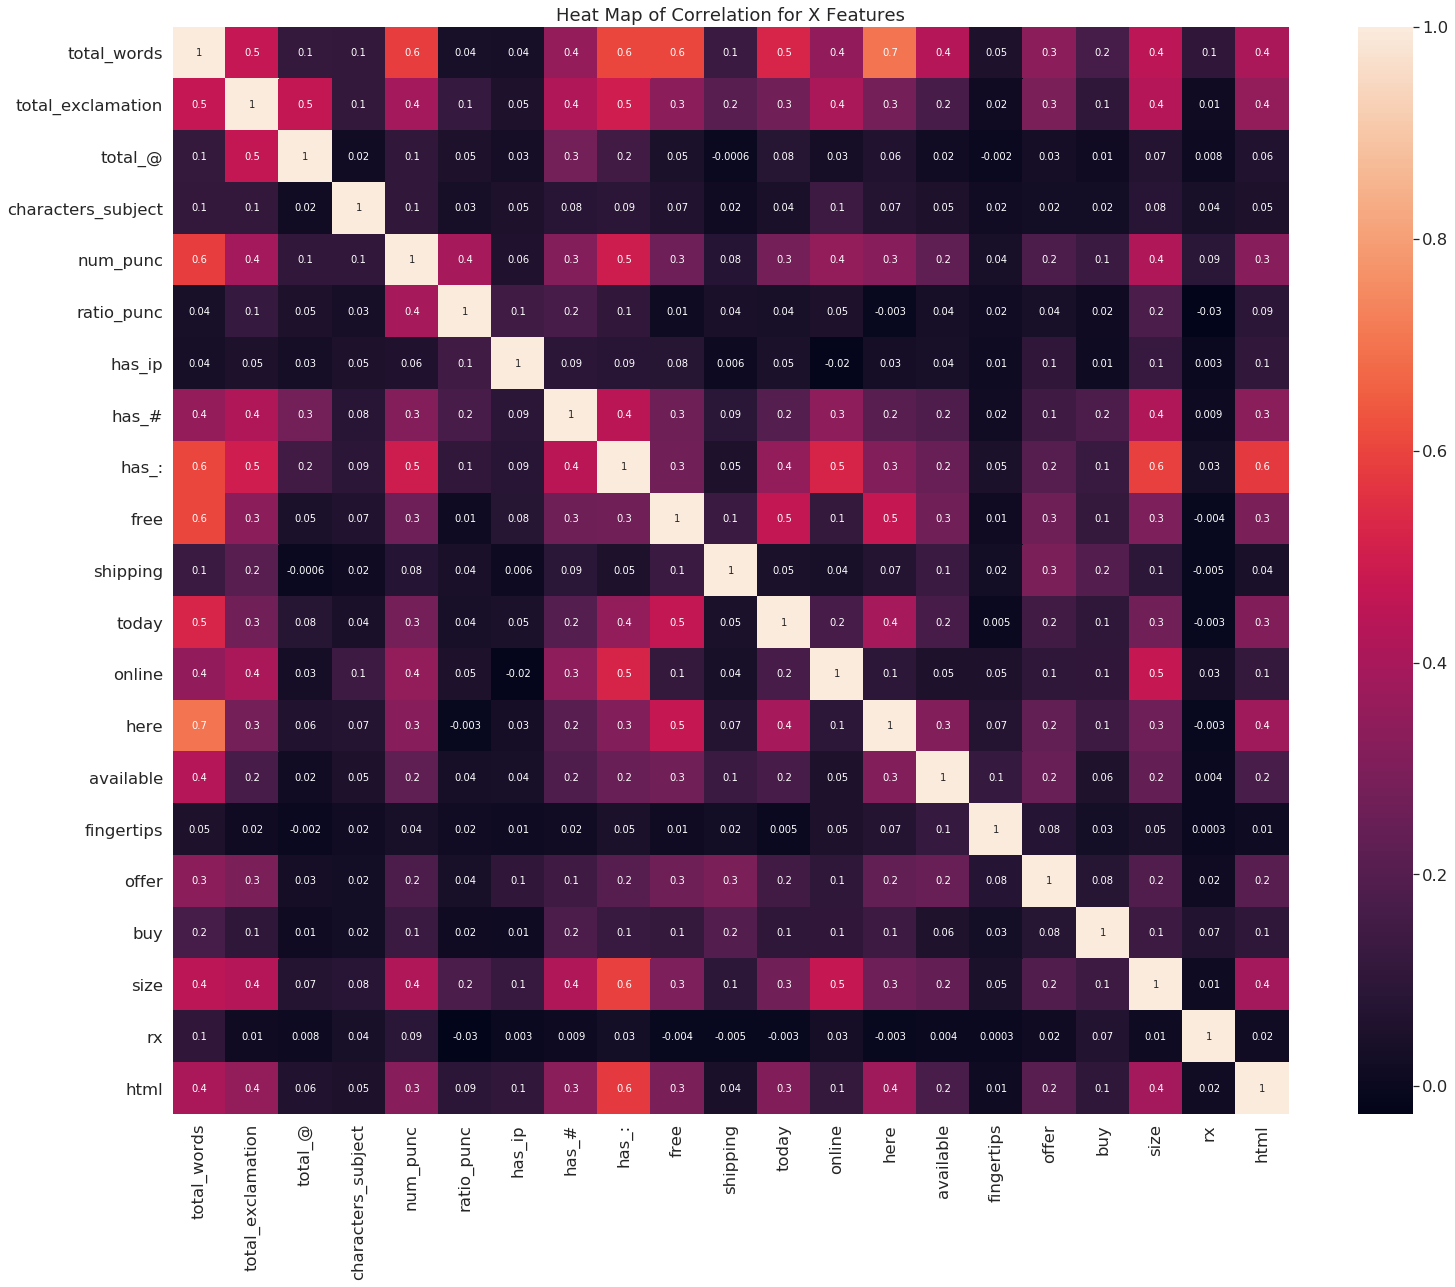

In [23]:
# Write your description (2-3 sentences) as a comment here:
# I wanted to see the correlation between different features to have a better idea how much penalization to use
# Therefore, I decided to use a heat map because it quickly shows the correlation matrix in a very understandable way.
# This information helped me to decide the amount of regularization that was needed

# Write the code to generate your visualization here:
train_c['has_ip'] = ip_address(train_c)
train_c['has_#'] = contains_word(train_c, '#')
train_c['has_:'] = contains_word(train_c, ":")
train_c['free'] = contains_word(train_c, 'free')
train_c['shipping'] = contains_word(train_c, 'shipping')
train_c['today'] = contains_word(train_c, 'today')
train_c['online'] = contains_word(train_c, 'online')
train_c['here'] = contains_word(train_c, 'here')
train_c['available'] = contains_word(train_c, 'available')
train_c['fingertips'] = contains_word(train_c, 'fingertips')
train_c['offer'] = contains_word(train_c, 'offer')
train_c['buy'] = contains_word(train_c, 'buy')
train_c['size'] = contains_word(train_c, 'size')
train_c['rx'] = contains_word(train_c, 'rx')
train_c['html'] = contains_word(train_c, 'html')
# use these features to make the heatmap
# drop id since it's not a variable for prediction

heat_map_dta = train_c.drop(['id', 'spam'], axis = 1)

plt.subplots(figsize=(25,20))

sns.heatmap(heat_map_dta.corr(), annot=True, fmt='.1g')
plt.title('Heat Map of Correlation for X Features')


# Note: if your plot doesn't appear in the PDF, you should try uncommenting the following line:
#plt.show()

# Question 9: Submitting to Kaggle

The following code will write your predictions on the test dataset to a CSV, which you can submit to Kaggle. You may need to modify it to suit your needs.

Save your predictions in a 1-dimensional array called `test_predictions`. *Even if you are not submitting to Kaggle, please make sure you've saved your predictions to `test_predictions` as this is how your score for this question will be determined.*

Remember that if you've performed transformations or featurization on the training data, you must also perform the same transformations on the test data in order to make predictions. For example, if you've created features for the words "drug" and "money" on the training data, you must also extract the same features in order to use scikit-learn's `.predict(...)` method.

You should submit your CSV files to https://www.kaggle.com/t/c76d80f7d3204159865a324ec2936f18

**Note: You may submit up to 4 times a day. If you have submitted 4 times on a day, you will need to wait until the next day for more submissions.**

Note that this question is graded on an absolute scale based on the accuracy your model achieves on the test set and the score does not depend on your ranking on Kaggle. 

*The provided tests check that your predictions are in the correct format, but you must submit to Kaggle to evaluate your classifier accuracy.*

<!--
BEGIN QUESTION
name: q9
points: 15
-->

In [24]:
mat_pred = make_features(test)
mat_pred = np.nan_to_num(mat_pred)
test_predictions = model.predict(mat_pred)
test_predictions

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,

In [25]:
ok.grade("q9");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



The following saves a file to submit to Kaggle.

In [26]:
from datetime import datetime

# Assuming that your predictions on the test set are stored in a 1-dimensional array called
# test_predictions. Feel free to modify this cell as long you create a CSV in the right format.

# Construct and save the submission:
submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])
timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2020-04-27T15:32:04.csv.
You may now upload this CSV file to Kaggle for scoring.


# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 5 EXPORTED QUESTIONS -->

In [27]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj2b.ipynb', 'proj2b.pdf')
ok.submit()

Generating PDF...
Saved proj2b.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... 

ERROR  | auth.py:91 | {'error': 'invalid_grant'}


Saved 'proj2b.ipynb'.
Performing authentication
Please enter your bCourses email.
bCourses email: danielclampert@berkeley.edu

Copy the following URL and open it in a web browser. To copy,
highlight the URL, right-click, and select "Copy".

https://okpy.org/client/login/

After logging in, copy the code from the web page, paste it below,
and press Enter. To paste, right-click and select "Paste".

Paste your code here: hxzivOo7nCHivMPoKP1YLfhauoBMgM
Successfully logged in as danielclampert@berkeley.edu
Submit... 100% complete
Submission successful for user: danielclampert@berkeley.edu
URL: https://okpy.org/cal/data100/sp20/proj2b/submissions/E0PK4W

